![Loan Prediction EDA based on Customer Behaviour](https://miro.medium.com/max/735/0*lAkevA6upQBq-NCk.jpg)
## Loan Prediction based on Customer Behaviour [EDA+Prediction]
## Accuracy of 91% 
Hey Guys, this is the first time I'm sharing a notebook please give feedback on how can I improve this. #HappyLearning 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv


In [2]:
df = pd.read_csv('../input/loan-prediction-based-on-customer-behavior/Training Data.csv')

# Data Cleaning + EDA

In [3]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


# Cleaning names with special characters and numbers

In [4]:
def unclean_names(col):
    unclean_names = []
    for name in df[str(col)].unique():
        if name.endswith(']'):
            unclean_names.append(name)
    return unclean_names

In [5]:
unclean_city_names = unclean_names('CITY')
unclean_city_names

['Tiruchirappalli[10]',
 'Kota[6]',
 'Hajipur[31]',
 'Erode[17]',
 'Anantapuram[24]',
 'Aurangabad[39]',
 'Purnia[26]',
 'Eluru[25]',
 'Siwan[32]',
 'Motihari[34]',
 'Warangal[11][12]',
 'Jehanabad[38]',
 'Kishanganj[35]',
 'Tirupati[21][22]',
 'Kurnool[18]',
 'Kadapa[23]',
 'Jammu[16]',
 'Rajahmundry[19][20]',
 'Saharsa[29]',
 'Jamalpur[36]',
 'Dehri[30]',
 'Nellore[14][15]',
 'Visakhapatnam[4]',
 'Buxar[37]',
 'Ramagundam[27]',
 'Sasaram[30]',
 'Guntur[13]',
 'Chittoor[28]',
 'Bettiah[33]',
 'Mysore[7][8][9]']

In [6]:
unclean_state_names = unclean_names('STATE')
unclean_state_names

['Uttar_Pradesh[5]']

In [7]:
def clean_df(df,col,unclean_list):
    for index,name in enumerate(df[col]):
        if name in unclean_list:
            if name.endswith(']'):
                name_ = name.strip('[]0123456789')
                df[col].iloc[index] = name_

In [8]:
clean_df(df,'STATE',unclean_state_names)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
clean_df(df,'CITY',unclean_city_names)

# Checking for any Outliers

Text(0.5, 0, 'Age')

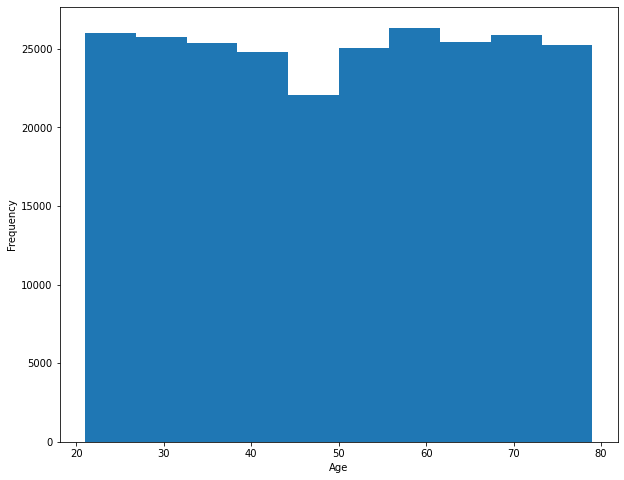

In [10]:
df['Age'].plot(kind='hist',figsize=(10,8))
plt.xlabel('Age')

<AxesSubplot:>

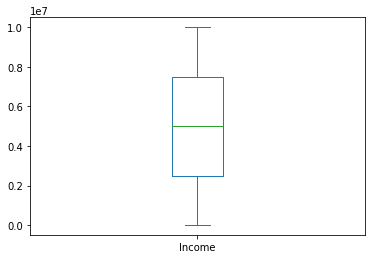

In [11]:
df['Income'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

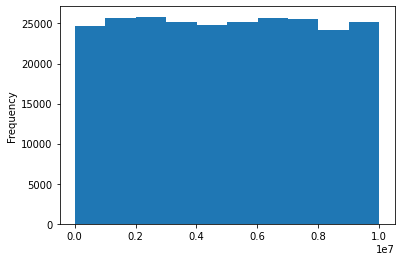

In [12]:
df['Income'].plot(kind='hist')

<AxesSubplot:>

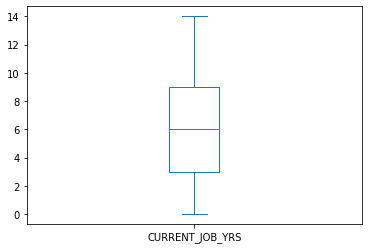

In [13]:
df['CURRENT_JOB_YRS'].plot(kind='box')

<AxesSubplot:>

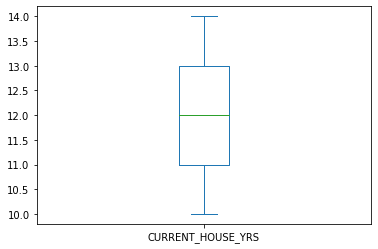

In [14]:
df['CURRENT_HOUSE_YRS'].plot(kind='box')

<AxesSubplot:>

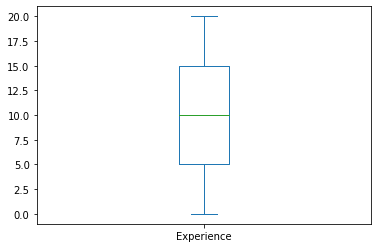

In [15]:
df['Experience'].plot(kind='box')

# EDA

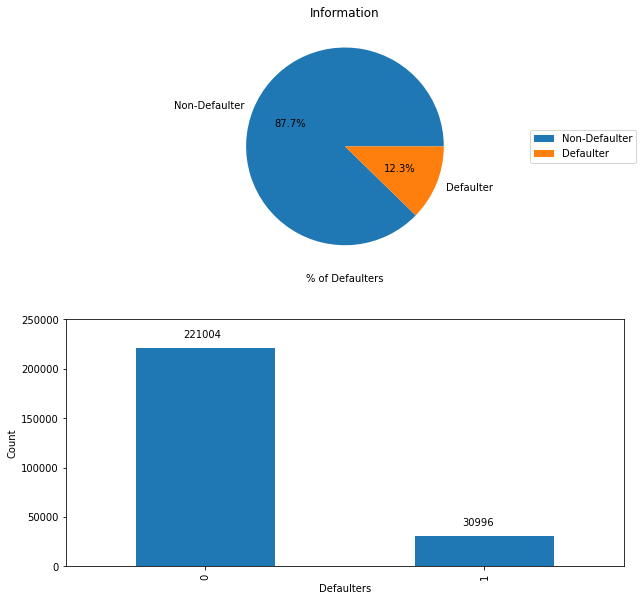

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,anchor='C')
plt.title('Information')
df.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'],autopct='%1.1f%%',ax=ax1,figsize=(10,10))
plt.xlabel('% of Defaulters')
plt.ylabel('')
plt.legend(loc='right',bbox_to_anchor=(0.7,0,1,1))
ax2 = fig.add_subplot(2,1,2,anchor='S')
df.groupby('Risk_Flag').count()['Id'].plot(kind='bar',ax=ax2)
plt.xlabel('Defaulters')
plt.ylabel('Count')
for index,value in enumerate(df.groupby('Risk_Flag').count()['Id']):
    plt.text(index-0.08,value+10000,str(value))
plt.ylim(0,250000)
plt.show()

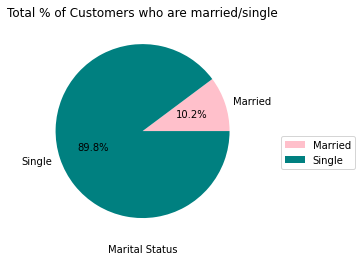

In [17]:
df.groupby('Married/Single').count()['Id'].plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%',colors=['Pink','Teal'])
plt.ylabel('')
plt.xlabel('Marital Status')
plt.title('Total % of Customers who are married/single')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

In [18]:
df.loc[df['Risk_Flag'] == 1].groupby('Married/Single').count()['Id']

Married/Single
married     2636
single     28360
Name: Id, dtype: int64

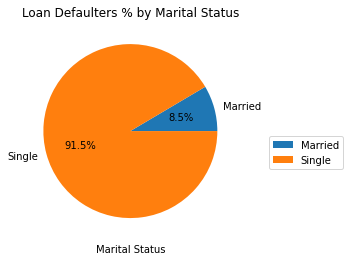

In [19]:
marital_status = df.loc[df['Risk_Flag'] == 1].groupby('Married/Single').count()['Id']
marital_status.plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Marital Status')
plt.title('Loan Defaulters % by Marital Status')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

In [20]:
house_ownership_count = df.groupby('House_Ownership').count()['Id']
house_ownership_count = [231898,7184,12918]

(0.0, 250000.0)

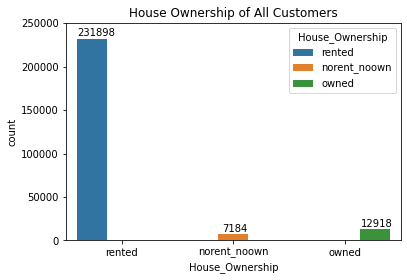

In [21]:
sns.countplot(data=df,x='House_Ownership',hue='House_Ownership',)
plt.text(-0.4,235000,str(231898))
plt.text(0.9,10000,str(7184))
plt.text(2.14,16000,str(12918))
plt.title('House Ownership of All Customers')
plt.ylim(0,250000)

In [22]:
df.loc[df['Risk_Flag'] == 1].groupby('House_Ownership').count()['Id']

House_Ownership
norent_noown      715
owned            1160
rented          29121
Name: Id, dtype: int64

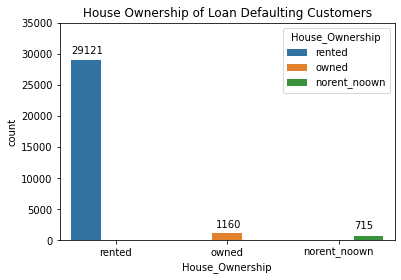

In [23]:
sns.countplot(data=df.loc[df['Risk_Flag'] == 1],x='House_Ownership',hue='House_Ownership')
plt.text(-0.4,30000,str(29121))
plt.text(0.9,2000,str(1160))
plt.text(2.14,1800,str(715))
plt.ylim(0,35000)
plt.title('House Ownership of Loan Defaulting Customers')
plt.show()

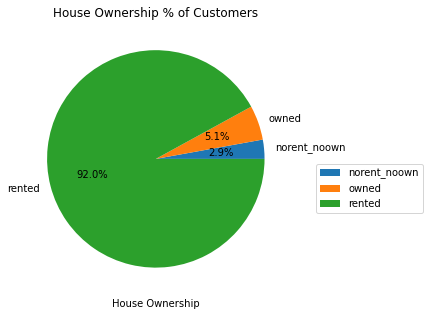

In [24]:
df.groupby('House_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%',figsize=(5,5))
plt.ylabel('')
plt.xlabel('House Ownership')
plt.title('House Ownership % of Customers')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))

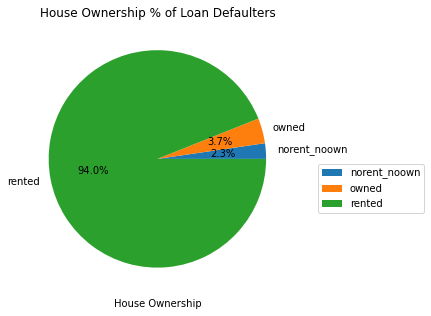

In [25]:
df.loc[df['Risk_Flag'] == 1].groupby('House_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%',figsize=(5,5))
plt.ylabel('')
plt.title('House Ownership % of Loan Defaulters')
plt.xlabel('House Ownership')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))

In [26]:
car_ownership = df.groupby('Car_Ownership').count()['Id']
car_ownership

Car_Ownership
no     176000
yes     76000
Name: Id, dtype: int64

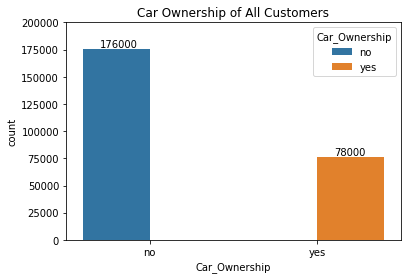

In [27]:
sns.countplot(data=df,x='Car_Ownership',hue='Car_Ownership')
plt.text(-0.3,177000,str(176000))
plt.text(1.1,78000,str(78000))
plt.ylim(0,200000)
plt.title('Car Ownership of All Customers')
plt.show()

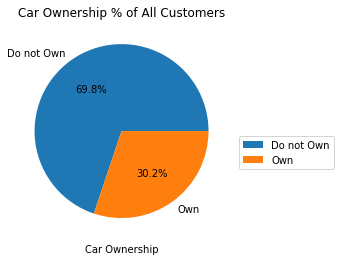

In [28]:
car_ownership.plot(kind='pie',startangle=0,labels=['Do not Own','Own'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Car Ownership')
plt.title('Car Ownership % of All Customers')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

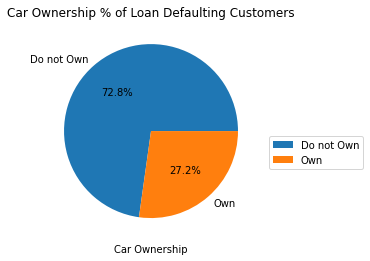

In [29]:
car_ownership_default = df.loc[df['Risk_Flag'] == 1].groupby('Car_Ownership').count()['Id']
car_ownership_default.plot(kind='pie',startangle=0,labels=['Do not Own','Own'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Car Ownership')
plt.title('Car Ownership % of Loan Defaulting Customers')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

In [30]:
df1 = df.loc[df['Risk_Flag'] == 1].groupby(['STATE','Risk_Flag']).count()
df1.rename(columns={'Id':'Total_Defaulters'},inplace=True)
df1.reset_index(inplace=True)
df1[['STATE','Total_Defaulters']]

,STATE,Total_Defaulters
0,Andhra_Pradesh,2935
1,Assam,930
2,Bihar,2583
3,Chandigarh,61
4,Chhattisgarh,511
5,Delhi,574
6,Gujarat,1343
7,Haryana,980
8,Himachal_Pradesh,111
9,Jammu_and_Kashmir,283


In [31]:
df2 = df.groupby('STATE').count()
df2.rename(columns={'Id':'Total_Loans'},inplace=True)
df2.reset_index(inplace=True)

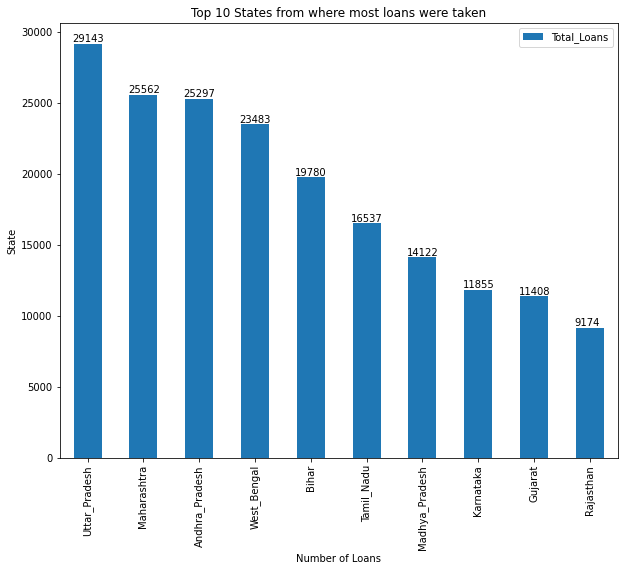

In [32]:
df_total_loans = df2[['STATE','Total_Loans']].sort_values(by='Total_Loans',ascending=False)[:10]
df_total_loans.plot(kind='bar',x='STATE',figsize=(10,8))
plt.title('Top 10 States from where most loans were taken')
plt.xlabel('Number of Loans')
plt.ylabel('State')
for index,value in enumerate(df_total_loans['Total_Loans'][:10]):
    plt.text(index-0.28,value+100,str(value))
plt.show()

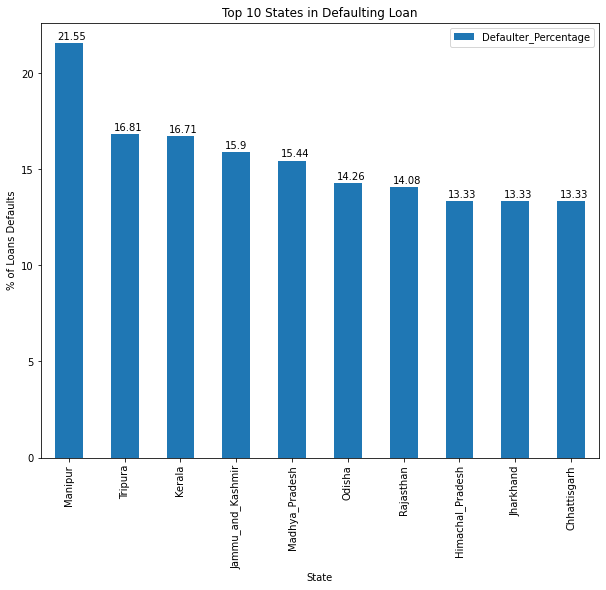

In [33]:
defaulter_percent_per_state = (df1['Total_Defaulters']/df2['Total_Loans']).round(4)*100
state_defaulters_percentage=pd.DataFrame(
    data=zip(df1['STATE'],defaulter_percent_per_state),
    columns=['STATE','Defaulter_Percentage']
)
df_dps = state_defaulters_percentage.sort_values(by='Defaulter_Percentage',ascending=False)[:10]
df_dps.plot(kind='bar',figsize=(10,8),x='STATE')
plt.title('Top 10 States in Defaulting Loan')
plt.ylabel('% of Loans Defaults')
plt.xlabel('State')
for index,value in enumerate(df_dps['Defaulter_Percentage'][:10]):
    plt.text(index-0.2,value+0.2,str(round(value,2)))
plt.legend(loc='best')
plt.show()

In [34]:
df3 = df.groupby('CITY').count()
df3.rename(columns={'Id':'Total_Loans'},inplace=True)
df3.reset_index(inplace=True)
df3[['CITY','Total_Loans']]

,CITY,Total_Loans
0,Adoni,953
1,Agartala,809
2,Agra,1012
3,Ahmedabad,649
4,Ahmednagar,645
...,...,...
311,Vijayanagaram,1259
312,Vijayawada,1172
313,Visakhapatnam,971
314,Warangal,459


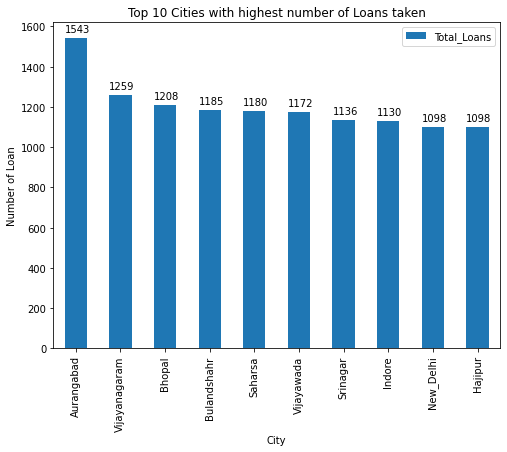

In [35]:
#top10 cities in number of loans

df3_ = df3[['CITY','Total_Loans']].sort_values(
                        by='Total_Loans',ascending=False)[:10]
df3_.plot(kind='bar',x='CITY',figsize=(8,6))
plt.title('Top 10 Cities with highest number of Loans taken')
plt.xlabel('City')
plt.ylabel('Number of Loan')
for index,value in enumerate(df3_['Total_Loans']):
    plt.text(index-0.25,value+30,str(int(value)))
plt.legend(loc='best')
plt.show()

In [36]:
df4 = df.loc[df['Risk_Flag'] == 1].groupby('CITY').count()
df4.rename(columns={'Id':'Total_Defaulters'},inplace=True)
df4.reset_index(inplace=True)
df4[['CITY','Total_Defaulters']]

,CITY,Total_Defaulters
0,Adoni,103
1,Agartala,136
2,Agra,81
3,Ahmedabad,133
4,Ahmednagar,38
...,...,...
311,Vijayanagaram,149
312,Vijayawada,147
313,Visakhapatnam,141
314,Warangal,25


In [37]:
defaulter_percent_per_city = (df4['Total_Defaulters']/df3['Total_Loans']).round(4)*100
city_defaulters_percentage=pd.DataFrame(
    data=zip(df3['CITY'],defaulter_percent_per_city),
    columns=['CITY','Defaulter_Percentage']
)
city_defaulters_percentage

,CITY,Defaulter_Percentage
0,Adoni,10.81
1,Agartala,16.81
2,Agra,8.00
3,Ahmedabad,20.49
4,Ahmednagar,5.89
...,...,...
311,Vijayanagaram,11.83
312,Vijayawada,12.54
313,Visakhapatnam,14.52
314,Warangal,5.45


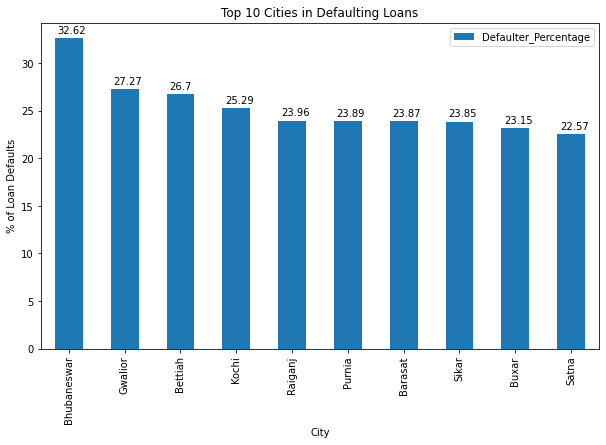

In [38]:
city_defaulters_percentage.sort_values(by='Defaulter_Percentage',ascending=False)[:10].plot(kind='bar',x='CITY',figsize=(10,6))
plt.title('Top 10 Cities in Defaulting Loans')
plt.xlabel('City')
plt.ylabel('% of Loan Defaults')
plt.legend(loc='best')
top_10_vals = city_defaulters_percentage['Defaulter_Percentage'].sort_values(ascending=False)[:10]
for index,value in enumerate(top_10_vals):
    plt.text(index-0.2,value+0.5,str(round(value,2)))
plt.show()

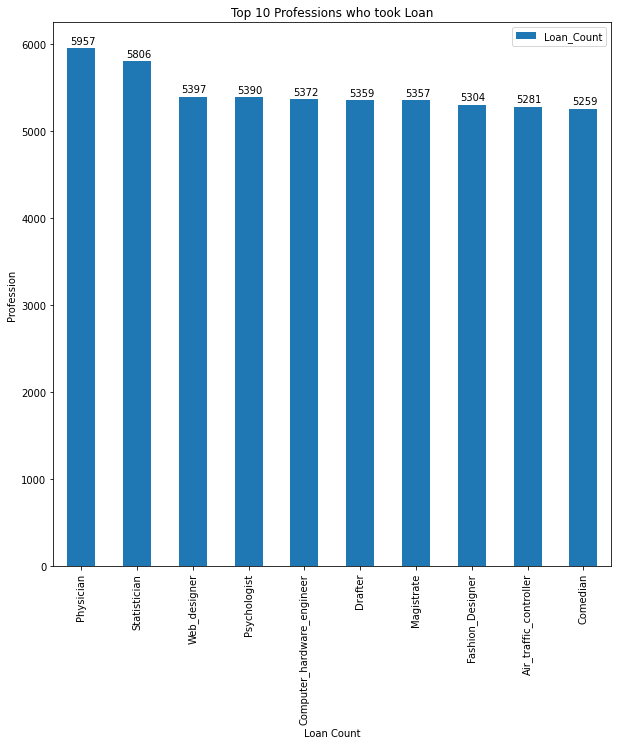

In [39]:
df_profession_loan_count = df.groupby('Profession').count()['Id'].sort_values(ascending=False)
df_plc = df_profession_loan_count.reset_index()
df_plc.rename(columns= {'Id':'Loan_Count'},inplace=True)
df_plc[:10].plot(kind='bar',x='Profession',figsize=(10,10))
plt.legend(loc='best')
plt.title('Top 10 Professions who took Loan')
plt.xlabel('Loan Count')
plt.ylabel('Profession')
for index,value in enumerate(df_plc['Loan_Count'][:10]):
    plt.text(index-0.2,value+50,str(value))
plt.show()   

In [40]:
profession = df.groupby(['Profession']).mean()[['Income','Risk_Flag']]

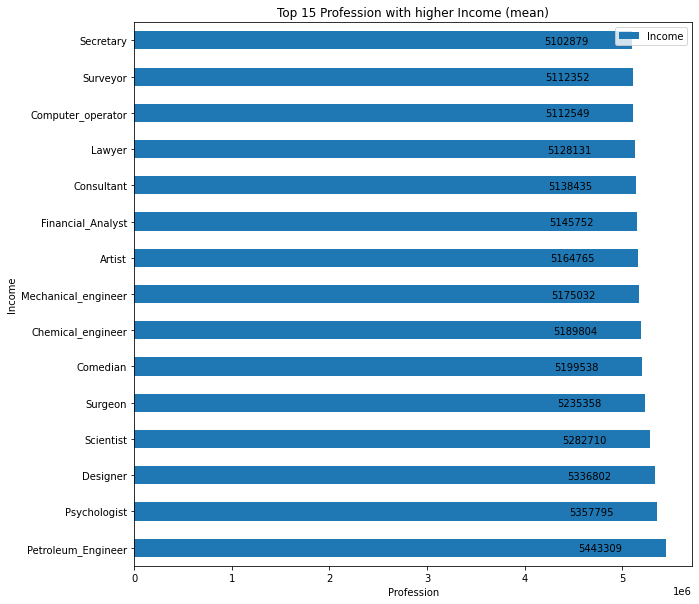

In [41]:
#plotting top10 profession_group with higher income

profession_top10_income = profession['Income'].sort_values(ascending=False)[:15]
profession_top10_income.plot(kind='barh',figsize=(10,10))
plt.title('Top 15 Profession with higher Income (mean)')
plt.xlabel('Profession')
plt.ylabel('Income')

for index,value in enumerate(profession_top10_income):
    plt.text(value-900000,index-0.1,str(int(value)))
plt.legend(loc='best')
plt.show()

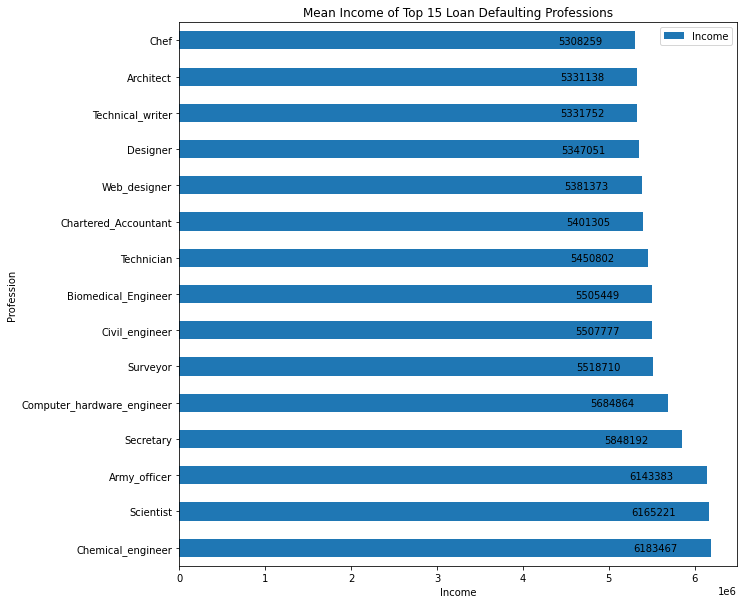

In [42]:
df_ = df.loc[df['Risk_Flag'] == 1].groupby(['Profession']).mean()[['Income']].sort_values(by='Income',ascending=False)
df_.sort_values(by='Income',ascending=False)[:15].plot(kind='barh',figsize=(10,10))
plt.title('Mean Income of Top 15 Loan Defaulting Professions') 
plt.xlabel('Income')
plt.ylabel('Profession')
for index,value in enumerate(df_['Income'][:15]):
    plt.text(value-900000,index-0.1,str(int(value)))

plt.legend(loc='best')
plt.show()

# Resampling the Data with Random Oversampler

In [43]:
from imblearn.over_sampling import RandomOverSampler

In [44]:
sampler = RandomOverSampler(random_state=42,sampling_strategy=0.45)
X = df.iloc[:,:-1]
y = df['Risk_Flag']

In [45]:
X_sampled,y_sampled = sampler.fit_resample(X,y)

In [46]:
from collections import Counter
print(Counter(y),Counter(y_sampled))

Counter({0: 221004, 1: 30996}) Counter({0: 221004, 1: 99451})


In [47]:
df_ = pd.concat([X_sampled,y_sampled],axis=1)

#### Now we can see that the classes are more even which makes easier for our model to predict loan defaulters 

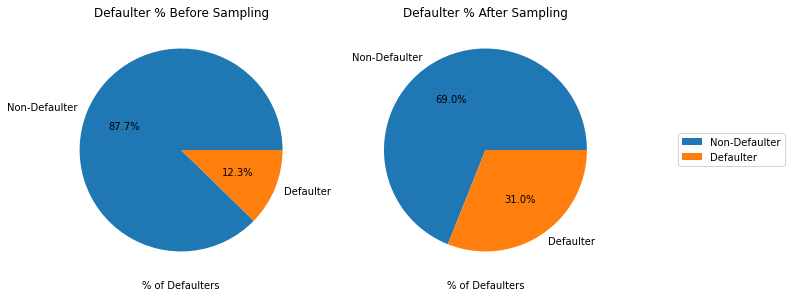

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.title('Defaulter % Before Sampling')
df.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'],autopct='%1.1f%%',ax=ax1,figsize=(10,10))
plt.xlabel('% of Defaulters')
plt.ylabel('')

ax2 = fig.add_subplot(122)
plt.title('Defaulter % After Sampling')
df_.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'],autopct='%1.1f%%',ax=ax2,figsize=(10,10))
plt.xlabel('% of Defaulters')
plt.ylabel('')
plt.legend(loc='right',bbox_to_anchor=(0.7,0,1,1))


# Encoding the Categorical data 

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
cols_to_encode= ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
labelencoder = LabelEncoder()

for col in cols_to_encode:
    df_[col] = labelencoder.fit_transform(df_[col])

#### Checking if there is any null exists in our dataset

In [51]:
df_.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [52]:
#Dropping Id as it's not needed in prediction
df_.drop(['Id'],axis=1,inplace=True)

In [53]:
df_

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,250,13,3,13,0
1,7574516,40,10,1,2,0,43,226,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,53,17,2,12,1
4,5768871,47,11,1,2,0,11,295,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
320450,9205302,77,13,1,2,1,34,80,10,11,13,1
320451,140516,29,19,1,2,0,39,310,22,14,10,1
320452,9763429,73,5,1,2,0,15,297,0,5,11,1
320453,6877905,40,9,1,2,1,30,63,25,7,11,1


In [54]:
X = df_.iloc[:,:-1]
y = df_['Risk_Flag']

# Splitting the dataset into training and test set

In [55]:
from sklearn. model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
from sklearn.metrics import f1_score,classification_report,plot_confusion_matrix,plot_roc_curve

# Prediction

F1 Score: 0.8722408430715343

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     66611
           1       0.79      0.98      0.87     29526

    accuracy                           0.91     96137
   macro avg       0.89      0.93      0.90     96137
weighted avg       0.93      0.91      0.91     96137



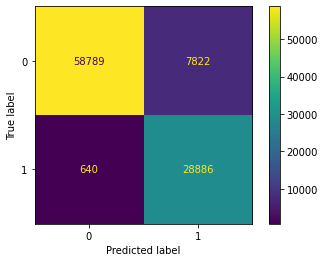

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred = dt.predict(X_test)
print(f'F1 Score: {f1_score(y_test,pred)}\n')
print(classification_report(y_test,pred))
plot_confusion_matrix(estimator=dt,X=X_test,y_true=y_test)

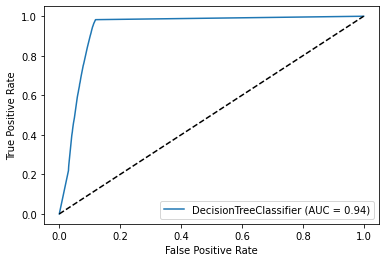

In [58]:
plot_roc_curve(estimator=dt,X=X_test,y=y_test)
plt.plot([0,1],[0,1],"--",c='black')

### We've achieved the Accuracy of 91% and F1 Score of 0.87 